# Transformación de datos

En estadística, la transformación de datos se utiliza para ajustar valores de una variable a una distribución normal. Los datos se pueden transformar usando por ejemplo la raíz cuadrada o el logaritmo para asegurarse que los datos se ajusten a los supuestos de los modelos. Con la transformación, los datos pueden utilizarse para análisis como regresión, t de student, correlación y análisis de varianza.




#### Determinación del sesgo o asimetría

Las medidas de skewness (sesgo o asimetría) son indicadores que permiten establecer el grado de sesgo que presenta una distribución de probabilidad de una variable aleatoria. Si una distribución es simétrica, existe el mismo número de valores a la derecha que a la izquierda de la media, por tanto, el mismo número de desviaciones con signo positivo que con signo negativo.

La función "skew" nos da una medida de en que dirección está desbalanceada la distribución y la función "kurt" del grado de desbalanceo (cómo es de "afilada")

Si el valor resultante de "skew" está por encima de +1 o por debajo de -1, los datos están muy sesgados. Si está entre +0.5 y -0.5, está sesgado moderadamente. Si el valor es 0, entonces los datos son simétricos.

 skewness: -1.194570307262883
 kurtosis: 0.9412265624999989


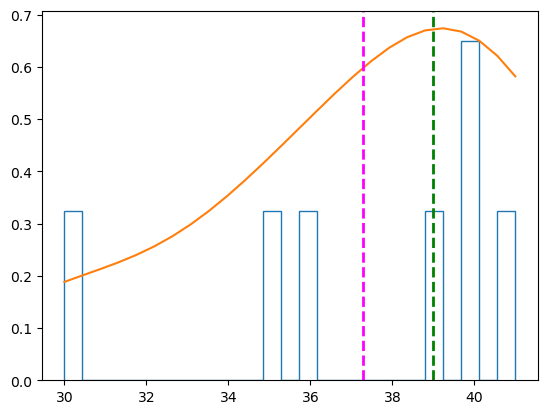

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Hours':[41,40,36,30,35,39,40]})

hours = df['Hours']
density = stats.gaussian_kde(hours)
n, x, _ = plt.hist(hours, histtype='step', density=True, bins=25)
plt.plot(x, density(x)*7)
plt.axvline(hours.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(hours.median(), color='green', linestyle='dashed', linewidth=2)

print(' skewness: ' + str(hours.skew()))
print(' kurtosis: ' + str(hours.kurt()))

plt.show()

#### Transformaciones raíz, potencia y logaritmo


Raíz cuadrada
Raíz cuadrada skewness: -1.2737746003610426
Raíz cuadrada kurtosis: 1.2379234026771364


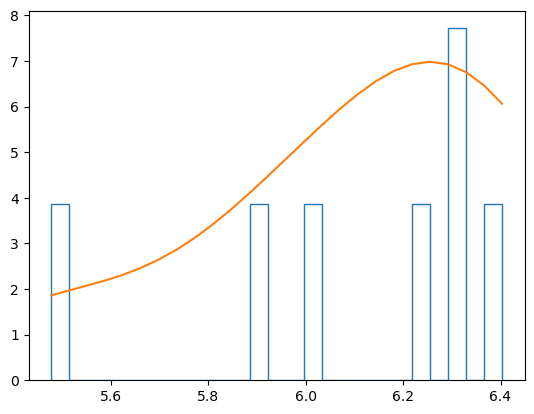



Raíz cúbica
Raíz cúbica skewness: -1.3003155607723278
Raíz cúbica kurtosis: 1.3389818259202473


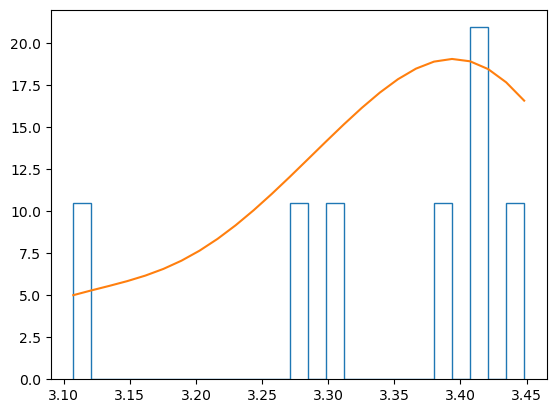



Logaritmo
Logaritmo skewness: -1.3535001366170503
Logaritmo kurtosis: 1.543787819461814


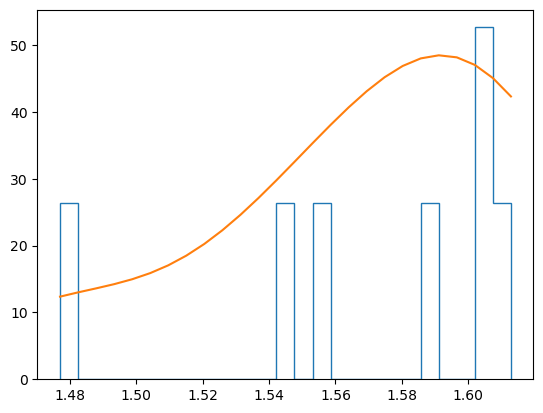



Cuadrado
Cuadrado skewness: -1.0395132200703212
Cuadrado kurtosis: 0.38433733170804985


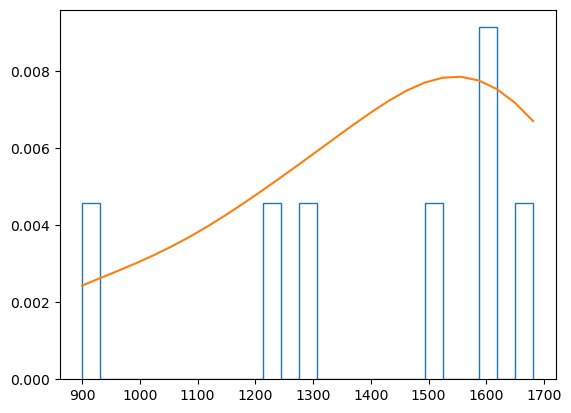

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Hours':[41,40,36,30,35,39,40]})

hours = df['Hours']
df["Raíz cuadrada"] = np.sqrt(hours)
df["Raíz cúbica"] = np.cbrt(hours)
df["Logaritmo"] = np.log10(hours)
df["Cuadrado"] = np.square(hours)

numcols = ["Raíz cuadrada", "Raíz cúbica", "Logaritmo", "Cuadrado"]

for col in numcols:
    print(df[col].name)
    print(df[col].name + ' skewness: ' + str(df[col].skew()))
    print(df[col].name + ' kurtosis: ' + str(df[col].kurt()))
    density = stats.gaussian_kde(df[col])
    n, x, _ = plt.hist(df[col], histtype='step', density=True, bins=25)
    plt.plot(x, density(x)*6)
    plt.show()
    print('\n')


Parece que la transformación que mejor se adapta es la de elevar al cuadrado

Probemos con una distribución sesgada hacia el lado izquierdo


Raíz cuadrada
Raíz cuadrada skewness: 0.6466363822916701
Raíz cuadrada kurtosis: -1.3005114584611395


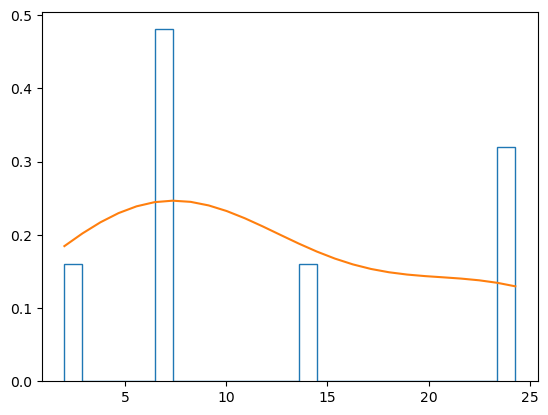



Raíz cúbica
Raíz cúbica skewness: 0.35173821875081823
Raíz cúbica kurtosis: -1.1739631698939217


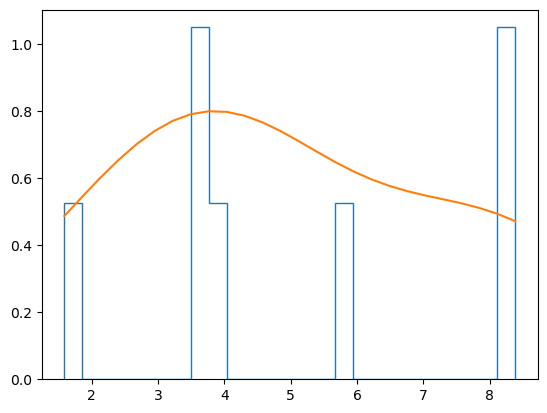



Logaritmo
Logaritmo skewness: -0.669683673653464
Logaritmo kurtosis: 0.5385785432597361


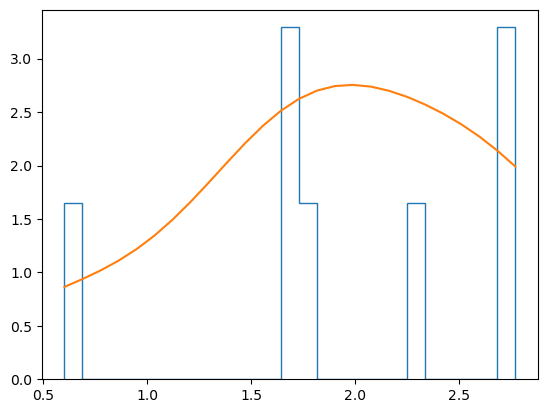



Cuadrado
Cuadrado skewness: 1.2343330712767013
Cuadrado kurtosis: -0.676193646641944


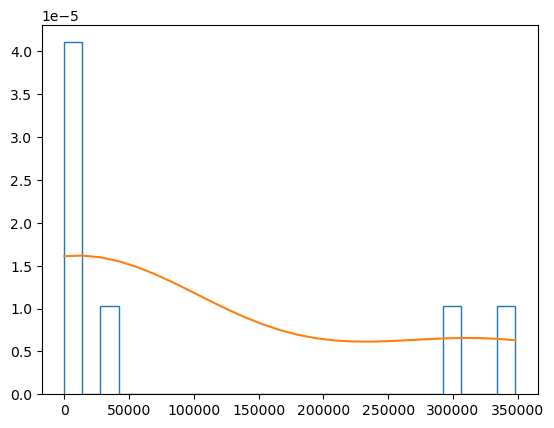

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Hours':[50,54,50,189,550,4,590]})

hours = df['Hours']
df["Raíz cuadrada"] = np.sqrt(hours)
df["Raíz cúbica"] = np.cbrt(hours)
df["Logaritmo"] = np.log10(hours)
df["Cuadrado"] = np.square(hours)

numcols = ["Raíz cuadrada", "Raíz cúbica", "Logaritmo", "Cuadrado"]

for col in numcols:
    print(df[col].name)
    print(df[col].name + ' skewness: ' + str(df[col].skew()))
    print(df[col].name + ' kurtosis: ' + str(df[col].kurt()))
    density = stats.gaussian_kde(df[col])
    n, x, _ = plt.hist(df[col], histtype='step', density=True, bins=25)
    plt.plot(x, density(x)*6)
    plt.show()
    print('\n')

En este caso parece se la transformación raíz cúbica la que menor curtosis nos da


#### Tratamiento de outliers
Si a pesar de las transformaciones anteriores (o en el caso de que no queramos efectuarlas) todavía nos quedan valores muy distantes de los demás podemos que optar por alguna de las siguientes soluciones para esos datos:


> Eliminarlos

> Imputarles otro valor (el percentil 5% o 95% por ejemplo)

El siguiente código se podría usar para eliminar outliers

In [4]:
q_low = df["col"].quantile(0.01)
q_hi  = df["col"].quantile(0.99)

df_filtrado = df[(df["col"] < q_hi) & (df["col"] > q_low)]

KeyError: 'col'

O mejor incluso basarse en el valor Z-score para la operación

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats


df = pd.DataFrame(np.random.randn(100, 3))
df_filtrado = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

#### Datos con campos nulos
En caso de encontrarnos con datos faltantes podemos optar por suprimir esos registros (si nuestra fuente de datos es abundante) o bien imputarles un varlor (la media o la mediana suele ser un buen valor candidato)



In [ ]:

df['col_filtrada'] = df['col'].fillna( df['col'].mean()) # Imputando los valores perdidos por la media
df['col_filtrada'] = df['col'].fillna( df['col'].median()) # Imputando los valores perdidos por la mediana


En sklearn también hay funciones especializadas en la imputación (SimpleInputer, KNNImputer,  ...)

In [ ]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5)
neighbors = knn.fit_transform(data)

#### Binning
Es una técnica transformación que permite agrupar en variables categóricas las variables numéricas. Normalmente se hace determinando rangos. Esto permite determinar patrones que no se observarían facilmente con datos continuos


In [ ]:
import pandas as pd

#perform binning with 3 bins
df['new_bin'] = pd.qcut(df['variable_name'], q=3)

También podríamos utilizar un algoritmo especializado para definir los rangos de cada uno de los grupos, como el algoritmo de K means (K medias). Este método de agrupamiento tiene como objetivo la partición de un conjunto de n observaciones en k grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano. Esta técnica es muy utilizada en minería de datos.

#### Estandarización de datos
La estandarización (también llamada normalización o escalado) se refiere al ajuste de los valores medidos en diferentes escalas respecto a una escala común. Es decir, ajusta todas las columnas al mismo rango.

Min-Max

La transformación es:
$$Xstd = \frac{(X - X.min(axis=0))}{(X.max(axis=0) - X.min(axis=0))}$$

$$Xscaled = X_std * (max - min) + min$$


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# define data
data = ([[100, 0.001], [8, 0.05], [50, 0.005], [88, 0.07], [4, 0.1]])
print(data)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[100, 0.001], [8, 0.05], [50, 0.005], [88, 0.07], [4, 0.1]]
[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


Z score:

Es el resultado de la restar cada valor menos la media poblacional y luego dividirlo entre la desviación estándar, como se aprecia en la siguiente fórmula

$$Z=\frac{(xi−μ)}{σ}$$

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
# define data
data = ([[100, 0.001], [8, 0.05], [50, 0.005], [88, 0.07], [4, 0.1]])
print(data)
# define min max scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[100, 0.001], [8, 0.05], [50, 0.005], [88, 0.07], [4, 0.1]]
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]
